In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
rand_coordinates = [( np.random.uniform(-90,90 ), np.random.uniform(-180,180) ) for k in range(1400)]

In [3]:
cities = []
for coordinate_pair in rand_coordinates:
    lat, long = coordinate_pair
    cities.append(citipy.nearest_city(lat, long))

In [4]:
cities_list=[]
for city in cities:
    country_code = city.country_code
    name = city.city_name
    cities_list.append(name)

In [5]:
actual_cities_list=[]
for city in cities_list:
    if city not in actual_cities_list:
        actual_cities_list.append(city)

## Generate Cities List

## Perform API Calls

In [6]:
import requests
from config import api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


city_name=[]
lat = []
temperatures = []
humidity= []
cloudiness = []
windspeed =[]
count = 1

for city in actual_cities_list: 
    print(f'City number {count}: {city}')
    print(query_url + str(city))
    count+=1   

City number 1: saleaula
http://api.openweathermap.org/data/2.5/weather?appid=c715f14e385e47aeb661d8256abeaa59&units=metric&q=saleaula
City number 2: new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=c715f14e385e47aeb661d8256abeaa59&units=metric&q=new norfolk
City number 3: abha
http://api.openweathermap.org/data/2.5/weather?appid=c715f14e385e47aeb661d8256abeaa59&units=metric&q=abha
City number 4: vaini
http://api.openweathermap.org/data/2.5/weather?appid=c715f14e385e47aeb661d8256abeaa59&units=metric&q=vaini
City number 5: mareeba
http://api.openweathermap.org/data/2.5/weather?appid=c715f14e385e47aeb661d8256abeaa59&units=metric&q=mareeba
City number 6: mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=c715f14e385e47aeb661d8256abeaa59&units=metric&q=mahebourg
City number 7: patacamaya
http://api.openweathermap.org/data/2.5/weather?appid=c715f14e385e47aeb661d8256abeaa59&units=metric&q=patacamaya
City number 8: anadyr
http://api.openweathermap.org/data/2.5/weath

In [7]:

for cities in actual_cities_list:
    response = requests.get(query_url + str(cities)).json()
    try:
        lat.append(response['coord']['lat'])
    except:
        continue
    city_name.append(response['name'])
    temperatures.append(response['main']['temp'])
    windspeed.append(response['wind']['speed'])
    cloudiness.append(response['clouds']['all'])
    humidity.append(response['main']['humidity'])

In [8]:
data=pd.DataFrame({"City":city_name, 
                    "Latitude":lat,
                    "Temperature":temperatures,
                    "Cloudiness":cloudiness,
                    "Windspeed":windspeed,
                    "Humidity":humidity})
data

,City,Latitude,Temperature,Cloudiness,Windspeed,Humidity
0,New Norfolk,-42.78,10.00,12,7.70,66
1,Abha,18.22,20.96,0,1.50,49
2,Vaini,15.34,20.93,92,3.87,98
3,Mareeba,-16.99,22.00,75,5.70,49
4,Mahebourg,-20.41,22.00,75,2.10,68
5,Patacamaya,-17.23,9.48,92,3.77,54
6,Anadyr,64.73,10.00,0,1.00,87
7,Punta Arenas,-53.16,2.00,90,2.60,100
8,Butaritari,3.07,27.88,20,3.52,100
9,Kapaa,22.08,27.54,90,8.20,78


In [9]:
exported_data=data.to_csv('Weather_Data.csv')

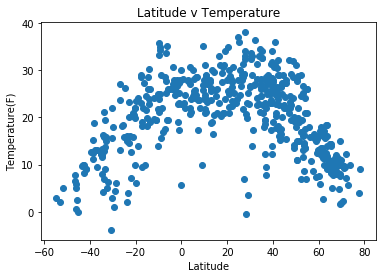

In [10]:
x_axis=data["Latitude"]
y_axis=data["Temperature"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Latitude v Temperature")
plt.savefig('Latitude_v_Temp')
plt.show()

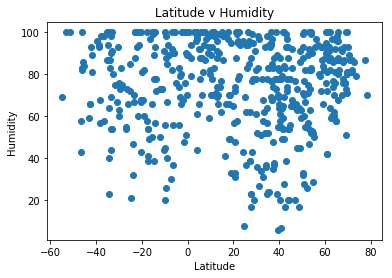

In [11]:
x_axis=data["Latitude"]
y_axis=data["Humidity"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude v Humidity")
plt.savefig('Latitude_v_Humidity')
plt.show()

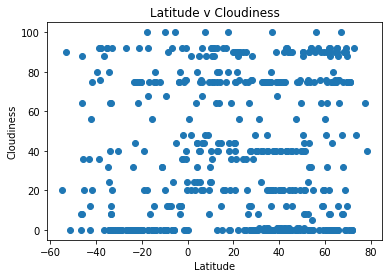

In [12]:
x_axis=data["Latitude"]
y_axis=data["Cloudiness"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude v Cloudiness")
plt.savefig('Latitude_v_Cloudiness')
plt.show()

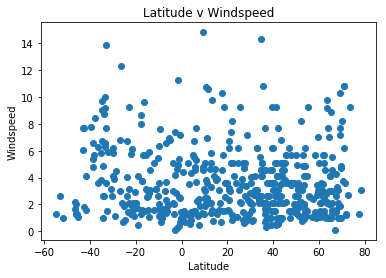

In [13]:
x_axis=data["Latitude"]
y_axis=data["Windspeed"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Latitude v Windspeed")
plt.savefig('Latitude_v_Windspeed')
plt.show()